In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from data import loader
from utils import supply_chain, vrp, warehouse

In [2]:
demand_df, prices_df, polygon_df = loader.create_datasets()

In [3]:
demand_df

,specie,polygon,demand
0,Agave lechuguilla,1,178
1,Agave salmiana,1,847
2,Agave scabra,1,178
3,Agave striata,1,178
4,Opuntia cantabrigiensis,1,210
...,...,...,...
125,Opuntia engelmani,26,142
126,Opuntia robusta,26,275
127,Opuntia streptacanta,26,242
128,Prosopis laevigata,26,327


In [4]:
warehouse = warehouse.Warehouse(
    # max_capacity = 4000,
    max_capacity=4_000,
    min_storage_days = 3
)

vrp_optimizer = vrp.VRP(
    polygon_df = polygon_df,
    hq_polygon = 18,
    # truck_capacity = 542,
    truck_capacity = 524,
    loading_time = 30,
    unloading_time = 30,
    max_time = 360,
    speed_kmh = 10.0
)

sc_optimizer = supply_chain.SASCOpt(
    demand_df = demand_df,
    prices_df = prices_df,
    polygon_df = polygon_df,
    max_load = 8_000,
    transport_cost = 4_500,
    iterations = 1_000,
    initial_temp = 1_000,
    cooling_rate = 0.995,
    log_file = './output/SA_Supply_Chain.log',
    warehouse = warehouse,
    vrp_optimizer = vrp_optimizer,
    utilization_threshold = 0.75,
    utilization_penalty_scale = 1_000_000
)

In [5]:
result = sc_optimizer.run()

order_schedule = result["order_schedule"]
warehouse_schedule = result["warehouse_schedule"]
vrp_schedule = result["vrp_schedule"]
fitness_cost = result["fitness_cost"]
real_cost = result["real_cost"]
supply_chain_utilization = result['supply_chain_utilization']
warehouse_utilization = result['warehouse_utilization']
vrp_utilization = result['vrp_utilization']

100%|██████████| 1000/1000 [12:52<00:00,  1.29it/s]


In [6]:
real_cost

1316296.0

In [7]:
utilization_df = pd.DataFrame({
    'Day': range(1, max(len(supply_chain_utilization), len(warehouse_utilization), len(vrp_utilization)) + 1),
    'Supply Chain Utilization': supply_chain_utilization + [None] * (max(len(warehouse_utilization), len(vrp_utilization)) - len(supply_chain_utilization)),
    'Warehouse Utilization': warehouse_utilization,
    'VRP Utilization': vrp_utilization
})
utilization_df.fillna(0, inplace=True)

In [8]:
utilization_df

,Day,Supply Chain Utilization,Warehouse Utilization,VRP Utilization
0,1,0.500000,1.00000,0
1,2,0.000000,1.00000,0
2,3,0.000000,1.00000,0
3,4,0.000000,1.00000,1572
4,5,0.196500,1.00000,1048
5,6,0.131000,1.00000,1380
6,7,0.172500,1.00000,0
7,8,0.000000,1.00000,1572
8,9,0.196500,1.00000,1048
9,10,0.131000,1.00000,1380


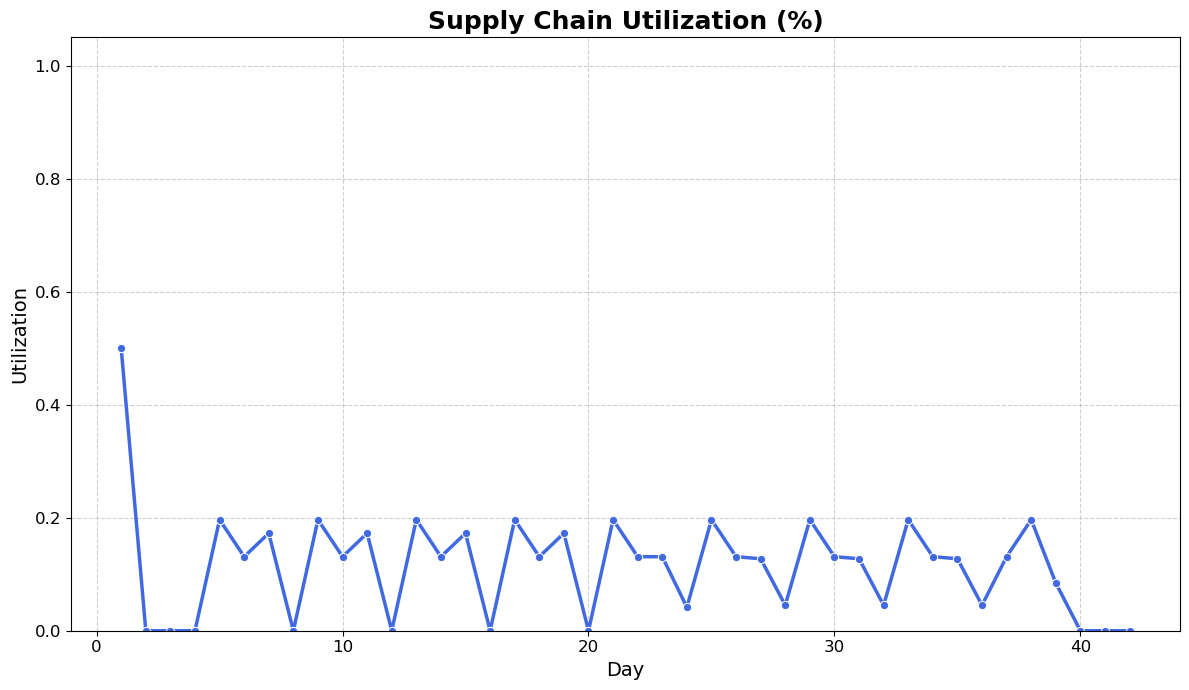

In [9]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=utilization_df,
    x='Day',
    y='Supply Chain Utilization',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.title('Supply Chain Utilization (%)', fontsize=18, fontweight='bold')
plt.ylabel('Utilization', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

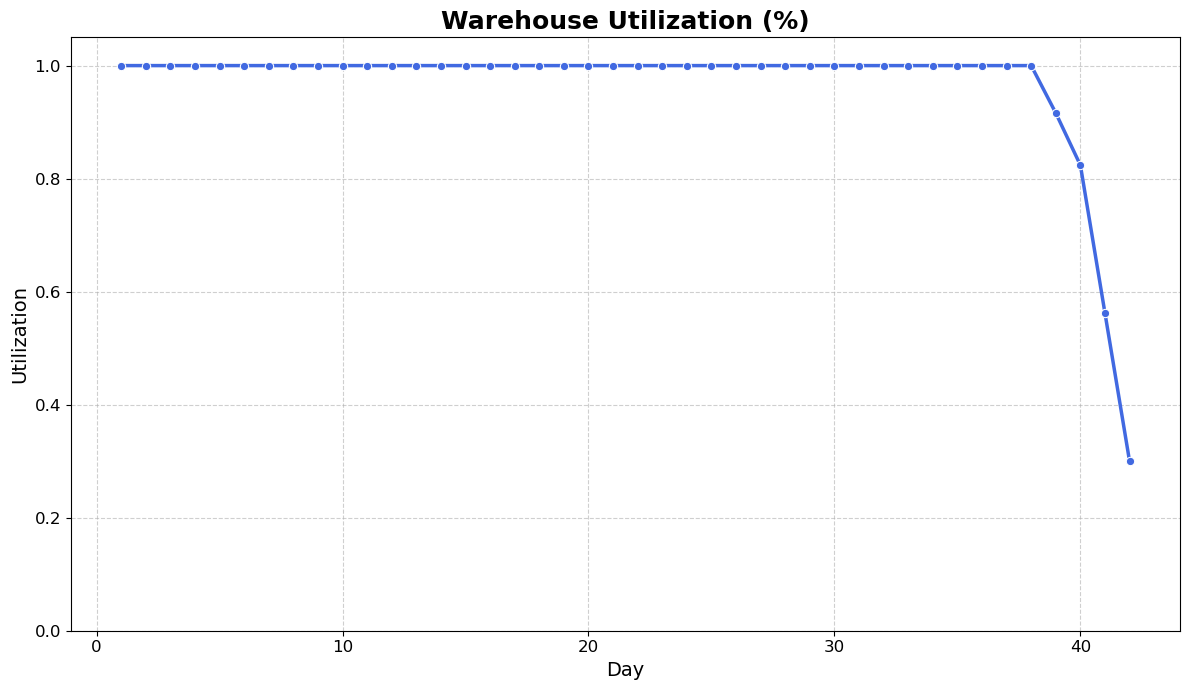

In [10]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=utilization_df,
    x='Day',
    y='Warehouse Utilization',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.title('Warehouse Utilization (%)', fontsize=18, fontweight='bold')
plt.ylabel('Utilization', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from data import loader
from utils import supply_chain, vrp, warehouse

In [ ]:
demand_df, prices_df, polygon_df = loader.create_datasets()

In [ ]:
demand_df

,specie,polygon,demand
0,Agave lechuguilla,1,178
1,Agave salmiana,1,847
2,Agave scabra,1,178
3,Agave striata,1,178
4,Opuntia cantabrigiensis,1,210
...,...,...,...
125,Opuntia engelmani,26,142
126,Opuntia robusta,26,275
127,Opuntia streptacanta,26,242
128,Prosopis laevigata,26,327


In [ ]:
warehouse = warehouse.Warehouse(
    # max_capacity = 4000,
    max_capacity=4_000,
    min_storage_days = 3
)

vrp_optimizer = vrp.VRP(
    polygon_df = polygon_df,
    hq_polygon = 18,
    # truck_capacity = 542,
    truck_capacity = 524,
    loading_time = 30,
    unloading_time = 30,
    max_time = 360,
    speed_kmh = 10.0
)

sc_optimizer = supply_chain.SASCOpt(
    demand_df = demand_df,
    prices_df = prices_df,
    polygon_df = polygon_df,
    max_load = 8_000,
    transport_cost = 4_500,
    iterations = 1_000,
    initial_temp = 1_000,
    cooling_rate = 0.995,
    log_file = './output/SA_Supply_Chain.log',
    warehouse = warehouse,
    vrp_optimizer = vrp_optimizer,
    utilization_threshold = 0.75,
    utilization_penalty_scale = 1_000_000
)

In [ ]:
result = sc_optimizer.run()

order_schedule = result["order_schedule"]
warehouse_schedule = result["warehouse_schedule"]
vrp_schedule = result["vrp_schedule"]
fitness_cost = result["fitness_cost"]
real_cost = result["real_cost"]
supply_chain_utilization = result['supply_chain_utilization']
warehouse_utilization = result['warehouse_utilization']
vrp_utilization = result['vrp_utilization']

100%|██████████| 1000/1000 [12:52<00:00,  1.29it/s]


In [ ]:
utilization_df = pd.DataFrame({
    'Day': range(1, max(len(supply_chain_utilization), len(warehouse_utilization), len(vrp_utilization)) + 1),
    'Supply Chain Utilization': supply_chain_utilization + [None] * (max(len(warehouse_utilization), len(vrp_utilization)) - len(supply_chain_utilization)),
    'Warehouse Utilization': warehouse_utilization,
    'VRP Utilization': vrp_utilization
})
utilization_df.fillna(0, inplace=True)

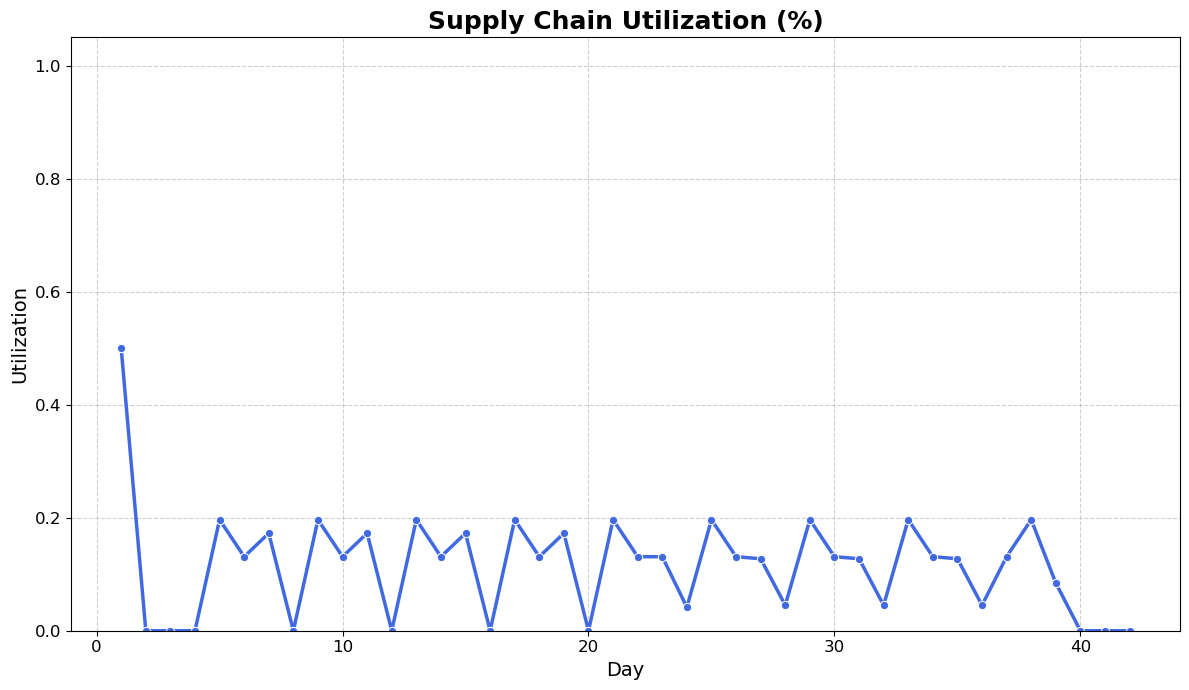

In [ ]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=utilization_df,
    x='Day',
    y='Supply Chain Utilization',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.title('Supply Chain Utilization (%)', fontsize=18, fontweight='bold')
plt.ylabel('Utilization', fontsize=14)
plt.xlabel('Day', fontsize=14)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

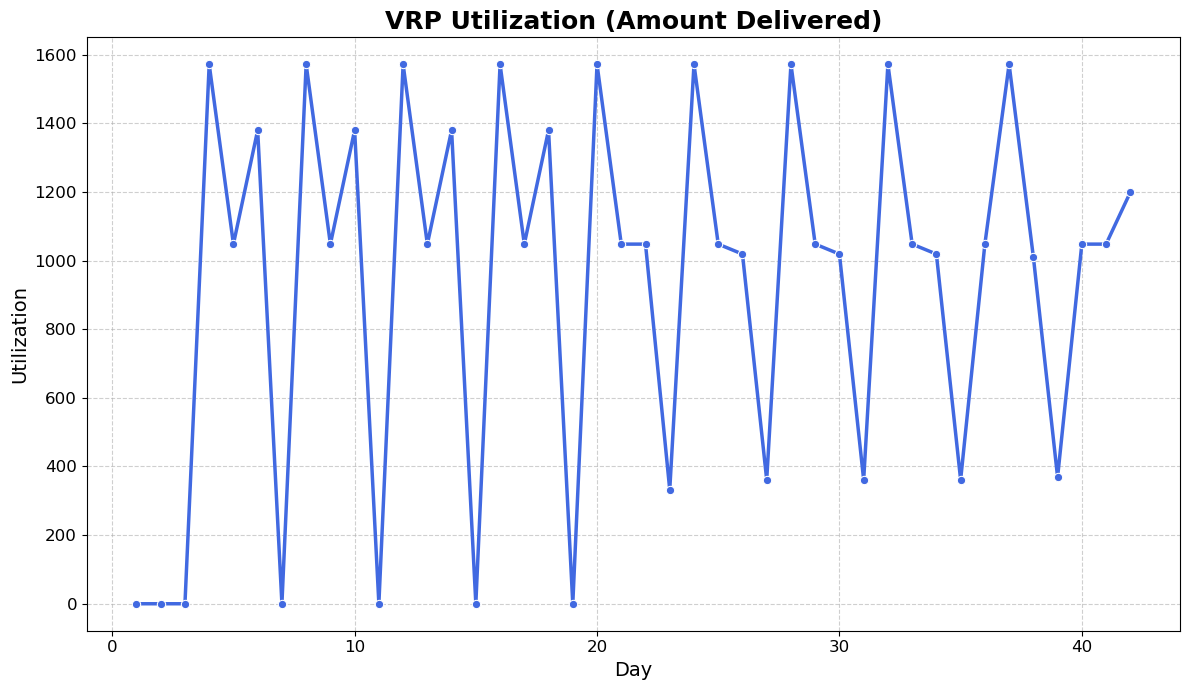

In [11]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=utilization_df,
    x='Day',
    y='VRP Utilization',
    marker='o',
    linewidth=2.5,
    color='royalblue'
)
plt.title('VRP Utilization (Amount Delivered)', fontsize=18, fontweight='bold')
plt.ylabel('Utilization', fontsize=14)
plt.xlabel('Day', fontsize=14)
# plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()